# Multinomial Logistic Regression from Scratch

#### Author: Victor Nascimento Ribeiro - January 2024

For a detailed explanation of the functions, please refer to the `multinomial_logistic_regression.py` file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from multinomial_logistic_regression import multinomial_logistic_regression
%matplotlib inline

In [2]:
def show_graph(X, y):
    # plot points
    plt.figure(figsize=(12,6))
    plt.tight_layout()
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-11,10)
    plt.ylim(-11,11)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
    plt.title('Dataset')
    plt.show()

## Creating a random non-linearly separable training set 

- Our training set consist in N radom points in $(x_1,x_2) \in [-10, 10] \times [-10, 10] \subseteq R^2$ region

- Let us fix a function $f_1(x) = a - e^{\normalsize x - a}$ and $f_2(x) = \frac{a}{2} sin(x), \; a \in R $

- let's decide which class each point belongs to using $f_1(x)$ and $f_2(x)$: <br /> 
  - if $f_1(x_2) \, < \, x_1$ and $f_2(x_1) \, < \,x_2$ it belongs to  <font color="ff0029">RED</font> class
  - if $f_1(x_2) \, > \, x_1$ and $f_2(x_1) \, < \,x_2$ it belongs to <font color="#008fff">BLUE</font> class
  - if $f_1(x_2) \, < \,x_1$ and $f_2(x_1) \, < \,x_2$ it belongs to <font color="5cff00">GREEN</font> class
  - if $f_1(x_2) \, > \,x_1$ and $f_2(x_1) \, > \,x_2$ it belongs to <font color="ff00bf">PINK</font> class

In [3]:
N = 150 # number of points

# creating a random data
x1 = np.random.randint(-10,10,N)
x2 = np.random.randint(-10,10,N)

X = np.column_stack((x1, x2))


# assign labels
a = 3
y = np.full(N, 1)
y[np.where(a/2*np.sin(x1) > x2)] += 1
y[np.where(a-np.exp(x2-a) > x1)] += 1
y[np.where(a-np.exp(x2-a) < x1)] -= 1

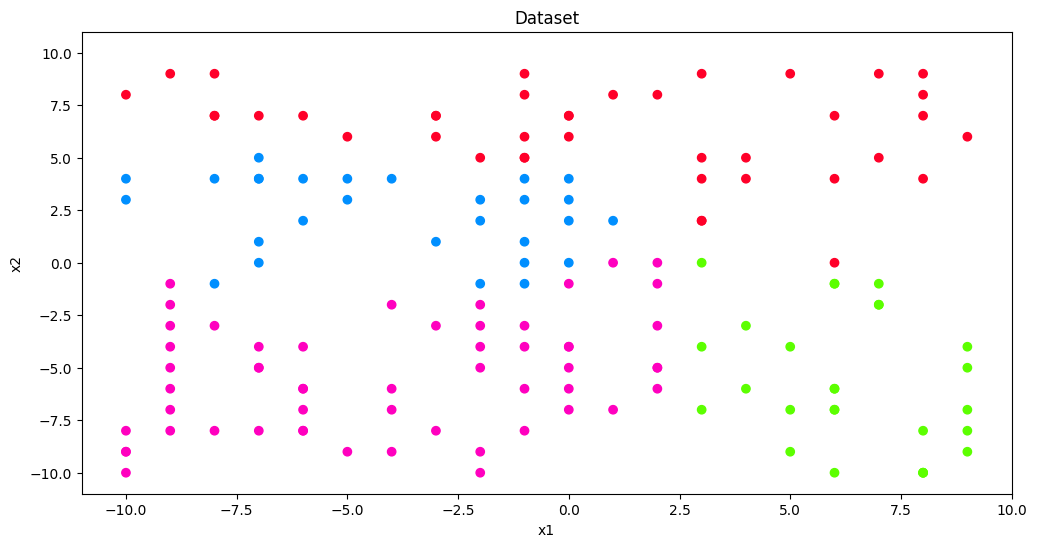

In [4]:
show_graph(X, y)

# Training

In [5]:
model = multinomial_logistic_regression()

In [6]:
model.fit(X, y, lr=0.001, epochs=5000)

In [7]:
loss_history = model.loss_history

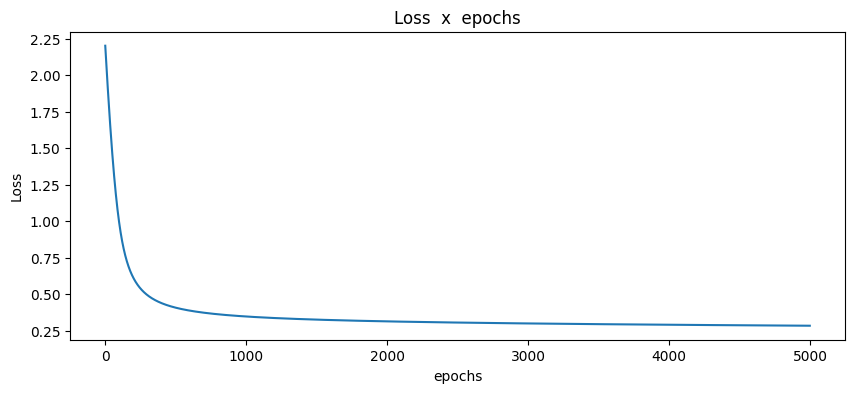

In [8]:
# plot loss
plt.figure(figsize=(10, 4))
plt.plot(loss_history)
plt.title("Loss  x  epochs")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

## Heatmap

In [9]:
x_all = np.array(np.meshgrid(np.arange(-11,11,0.1), np.arange(-11,11,0.1))).reshape(2,-1)
y_all = model.predict(x_all.T)

color_all = np.argmax(y_all, axis=1)
prob_all = np.max(y_all, axis=1)

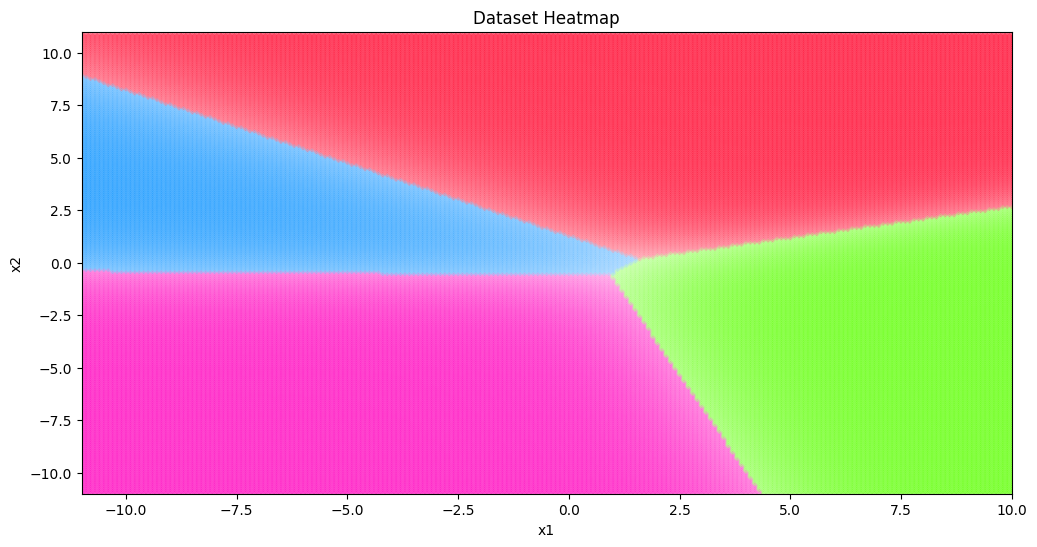

In [10]:
# plot 'heat map'
plt.figure(figsize=(12,6))
plt.tight_layout()
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-11,10)
plt.ylim(-11,11)
plt.title('Dataset Heatmap')
plt.scatter(x_all[0], x_all[1], marker='D', alpha=prob_all/3, c=color_all, s=7, cmap='gist_rainbow')
plt.show()

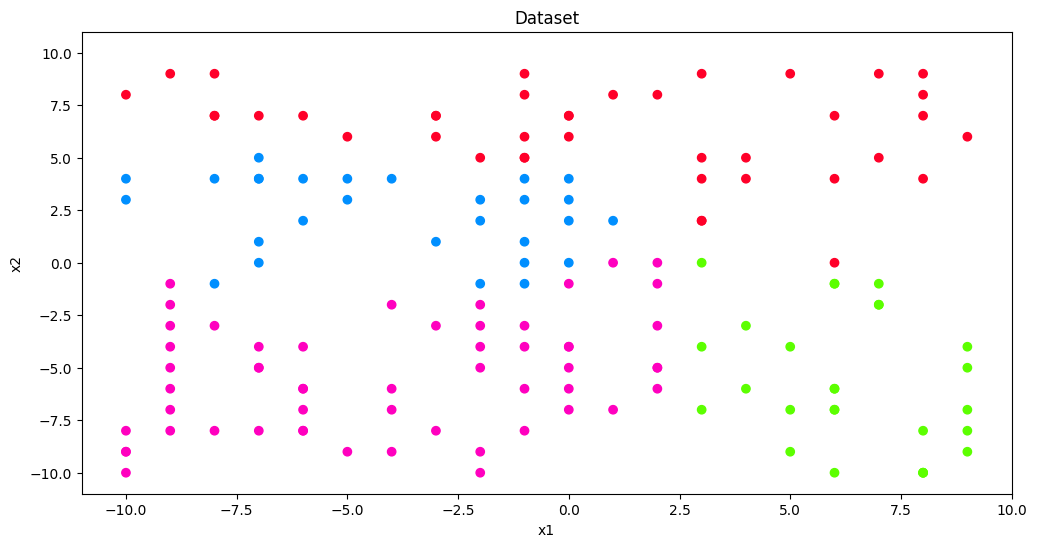

In [11]:
show_graph(X,y)

## Evaluate

- Create 30 random samples

In [12]:
N_test = 30 # number of points

# creating a random data
x1_test = np.random.randint(-10,10,N)
x2_test = np.random.randint(-10,10,N)

X_test = np.column_stack((x1_test, x2_test))


# assign labels
a = 3
y_test = np.full(N, 1)
y_test[np.where(a/2*np.sin(x1_test) > x2_test)] += 1
y_test[np.where(a-np.exp(x2_test-a) > x1_test)] += 1
y_test[np.where(a-np.exp(x2_test-a) < x1_test)] -= 1

In [13]:
acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc)

Accuracy:  0.8


## References

 - Abu-Mostafa, Yaser S., Magdon-Ismail, Malik and Lin, Hsuan-Tien. Learning From Data. : AMLBook, 2012.
 - https://work.caltech.edu/telecourse (lecture 9)
 - https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372
 - https://www.kamperh.com/data414/